# Part C: Technical Paper

## Pokemon Segmentation with K-Means

|            Name          |    Admin No.   |        Class      |
|:-------------------------:|:---------------:|:------------------:|
|   Timothy Chia Kai Lun   |    P2106911    |   DAAA/FT/2A/02   |

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from math import pi
 

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_samples, silhouette_score

sns.set_theme()

In [2]:
pokedex = pd.read_csv('data\pokemon.csv')
pokedex['type2'].fillna('-', inplace=True)

In [3]:
pokedex.head()

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,-,8.5,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,-,19.0,1,0


In [4]:
pokedex.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   abilities          801 non-null    object 
 1   against_bug        801 non-null    float64
 2   against_dark       801 non-null    float64
 3   against_dragon     801 non-null    float64
 4   against_electric   801 non-null    float64
 5   against_fairy      801 non-null    float64
 6   against_fight      801 non-null    float64
 7   against_fire       801 non-null    float64
 8   against_flying     801 non-null    float64
 9   against_ghost      801 non-null    float64
 10  against_grass      801 non-null    float64
 11  against_ground     801 non-null    float64
 12  against_ice        801 non-null    float64
 13  against_normal     801 non-null    float64
 14  against_poison     801 non-null    float64
 15  against_psychic    801 non-null    float64
 16  against_rock       801 non

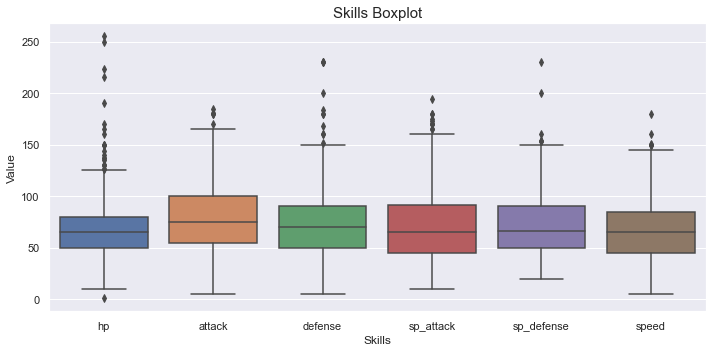

In [5]:
BoxPlotPkdex = pd.melt(pokedex, id_vars = [
    "name", 
    "type1", 
    "type2", 
    "generation"
    ], value_vars = [
    #"Total",
    "hp", "attack", "defense", "sp_attack",
    "sp_defense", "speed"    
])

plt.figure(figsize=(10,5))
ax = sns.boxplot(x="variable", y="value", data=BoxPlotPkdex)
plt.title("Skills Boxplot", fontsize=15)
plt.xlabel("Skills")
plt.ylabel("Value")
plt.tight_layout()
plt.show()

In [8]:
stats_cols = ['hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed']

In [9]:
pokedex[stats_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
hp,801.0,68.958801,26.576015,1.0,50.0,65.0,80.0,255.0
attack,801.0,77.857678,32.158820,5.0,55.0,75.0,100.0,185.0
defense,801.0,73.008739,30.769159,5.0,50.0,70.0,90.0,230.0
sp_attack,801.0,71.305868,32.353826,10.0,45.0,65.0,91.0,194.0
sp_defense,801.0,70.911361,27.942501,20.0,50.0,66.0,90.0,230.0
speed,801.0,66.334582,28.907662,5.0,45.0,65.0,85.0,180.0


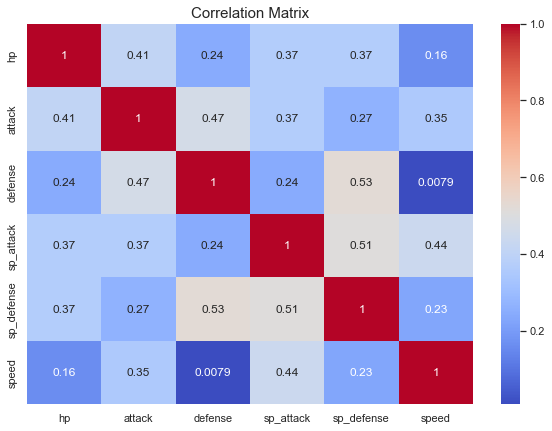

In [10]:
sns.set(rc={'figure.figsize':(10, 7)})
sns.heatmap(pokedex[stats_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix", fontsize=15)
plt.show()

In [11]:
scale = StandardScaler()
scaled_df = pd.DataFrame(scale.fit_transform(pokedex[stats_cols]), columns=scale.get_feature_names_out())

In [12]:
n_max_clusters = 15

inertia = []
silhoutte = []
for cluster in range(2, n_max_clusters):
    kmeans = KMeans(n_clusters = cluster, init="k-means++", random_state=10)
    kmeans.fit(scaled_df)

    labels = kmeans.labels_

    inertia.append(kmeans.inertia_)
    silhoutte.append(silhouette_score(scaled_df, labels))

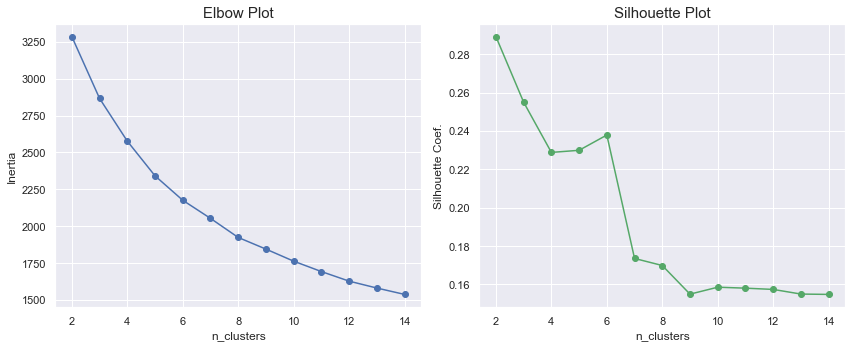

In [44]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,5))

axes[0].plot(range(2, n_max_clusters), inertia, marker='o', color='b')
axes[1].plot(range(2, n_max_clusters), silhoutte, marker='o', color='g')

# n = 5
# axes.annotate(f"Number of clusters = {n}", xy=(n, inertia[n]), xytext=(n-3, inertia[n]*0.8), arrowprops=dict(arrowstyle="->", color='red'), color='red')

axes[0].set_xlabel('n_clusters', fontsize=12)
axes[1].set_xlabel('n_clusters', fontsize=12)
axes[0].set_ylabel('Inertia', fontsize=12)
axes[1].set_ylabel('Silhouette Coef.', fontsize=12)

axes[0].set_title('Elbow Plot', fontsize=15)
axes[1].set_title('Silhouette Plot', fontsize=15)
# plt.title('Elbow and Silhouette Score Plot', fontsize=20)
plt.tight_layout()
plt.show()

In [14]:
kmeans = KMeans(n_clusters=6, init="k-means++", random_state=24)
kmeans.fit(scaled_df)
pokedex["clusters"] = kmeans.labels_

centroids = pd.DataFrame(scale.inverse_transform(kmeans.cluster_centers_))
centroids.columns = stats_cols
centroids["clusters"] = np.unique(kmeans.labels_)

In [15]:
centroids.astype(int)

,hp,attack,defense,sp_attack,sp_defense,speed,clusters
0,89,116,92,122,99,97,0
1,49,53,50,47,47,49,1
2,77,109,103,60,70,58,2
3,130,74,67,77,80,52,3
4,68,81,64,79,70,96,4
5,68,66,100,87,108,52,5


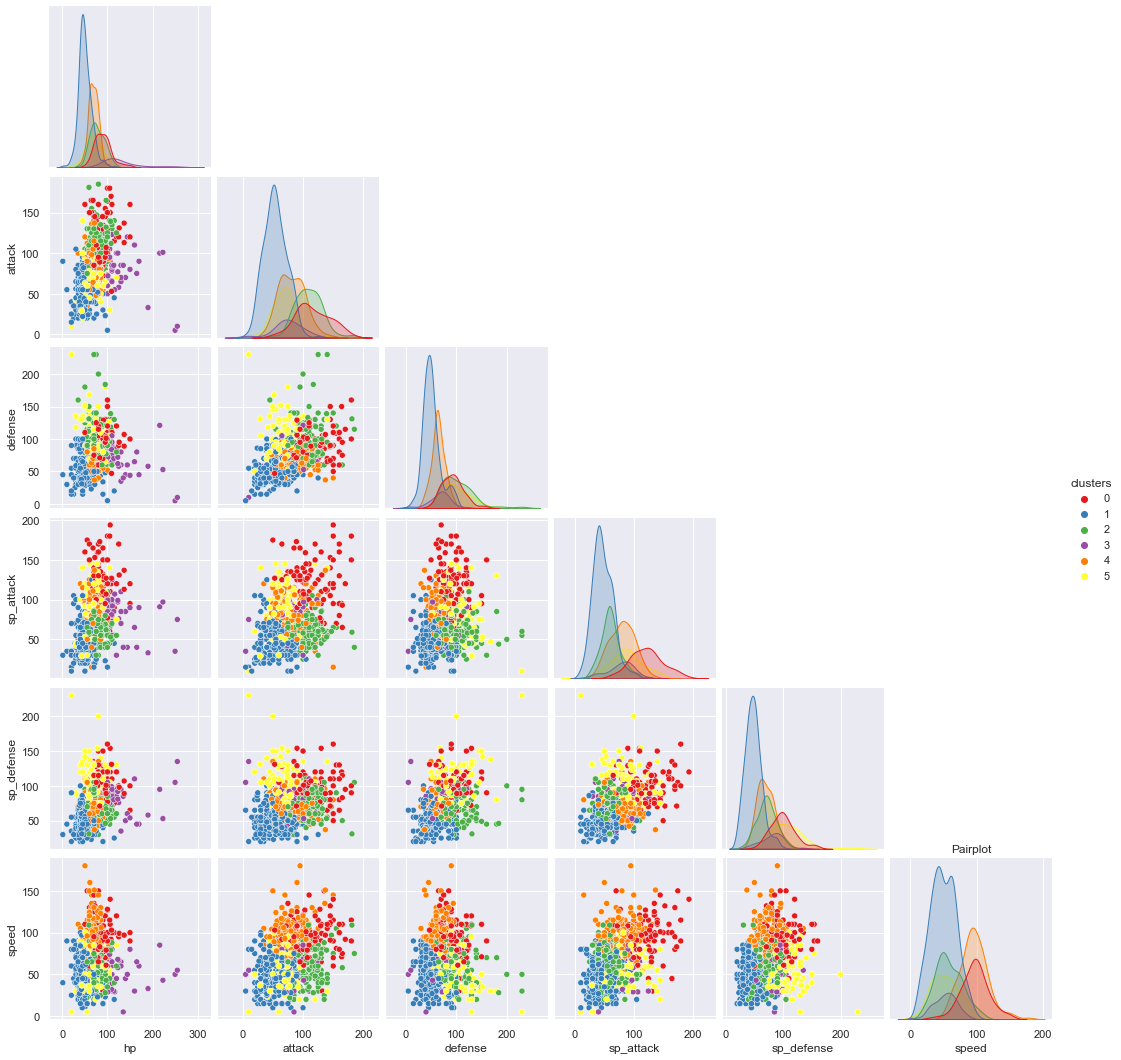

In [45]:
sns.pairplot(pokedex[stats_cols + ['clusters']], hue="clusters", palette='Set1', corner=True)
plt.show()

c:\Users\Timothy Chia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


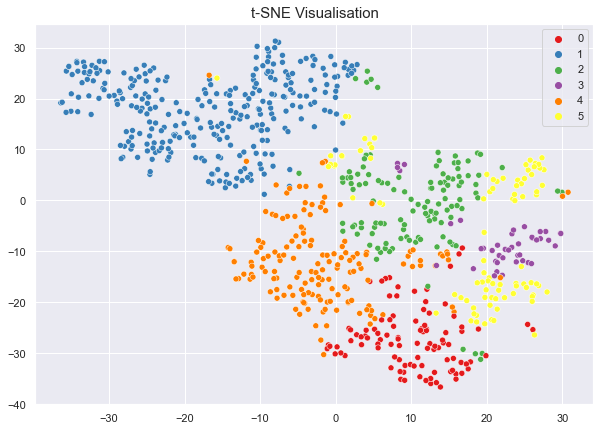

In [17]:
tsne = TSNE(n_components=2, learning_rate=200, random_state=24, n_jobs=2)
embedded = tsne.fit_transform(scaled_df)

sns.scatterplot(x=embedded[:,0], y=embedded[:,1], hue=kmeans.labels_, palette='Set1', legend='full')
plt.title('t-SNE Visualisation', fontsize=15)
plt.show()

In [18]:
grouped_pokedex = pokedex.groupby(["clusters"])

In [19]:
pokedex[stats_cols + ['clusters']].groupby(["clusters"]).median()

,hp,attack,defense,sp_attack,sp_defense,speed
clusters,,,,,,
0,90.0,110.0,90.0,120.0,100.0,99.0
1,48.0,53.0,48.0,45.0,48.0,49.0
2,75.0,108.5,99.0,60.0,70.0,55.0
3,112.5,74.0,70.0,83.0,84.0,53.0
4,70.0,80.0,63.0,80.0,70.0,95.0
5,67.5,69.0,95.0,90.0,105.0,50.0


In [20]:
grouped_pokedex[stats_cols].median().reset_index().describe().T

,count,mean,std,min,25%,50%,75%,max
clusters,6.0,2.500000,1.870829,0.0,1.250,2.5,3.750,5.0
hp,6.0,77.166667,21.969676,48.0,68.125,72.5,86.250,112.5
attack,6.0,82.416667,22.641592,53.0,70.250,77.0,101.375,110.0
defense,6.0,77.500000,20.305172,48.0,64.750,80.0,93.750,99.0
sp_attack,6.0,79.666667,25.819889,45.0,65.000,81.5,88.250,120.0
sp_defense,6.0,79.500000,21.276748,48.0,70.000,77.0,96.000,105.0
speed,6.0,66.833333,23.498227,49.0,50.750,54.0,85.000,99.0


In [21]:
df = grouped_pokedex[['hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed']].median().reset_index()
 
def make_spider( row, title, color):

    # number of variable
    categories=list(df)[1:]
    N = len(categories)

    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    # Initialise the spider plot
    ax = plt.subplot(2,3,row+1, polar=True, )

    # If you want the first axis to be on top:
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)

    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories, color='black', size=9)

    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks(np.arange(0, 200, 50), color="grey", size=10)
    plt.ylim(0, 200)

    # Ind1
    values=df.loc[row].drop('clusters').values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, color=color, linewidth=2, linestyle='solid')
    ax.fill(angles, values, color=color, alpha=0.4)

    # Add a title
    plt.title(title, size=15, color=color, y=1.1)

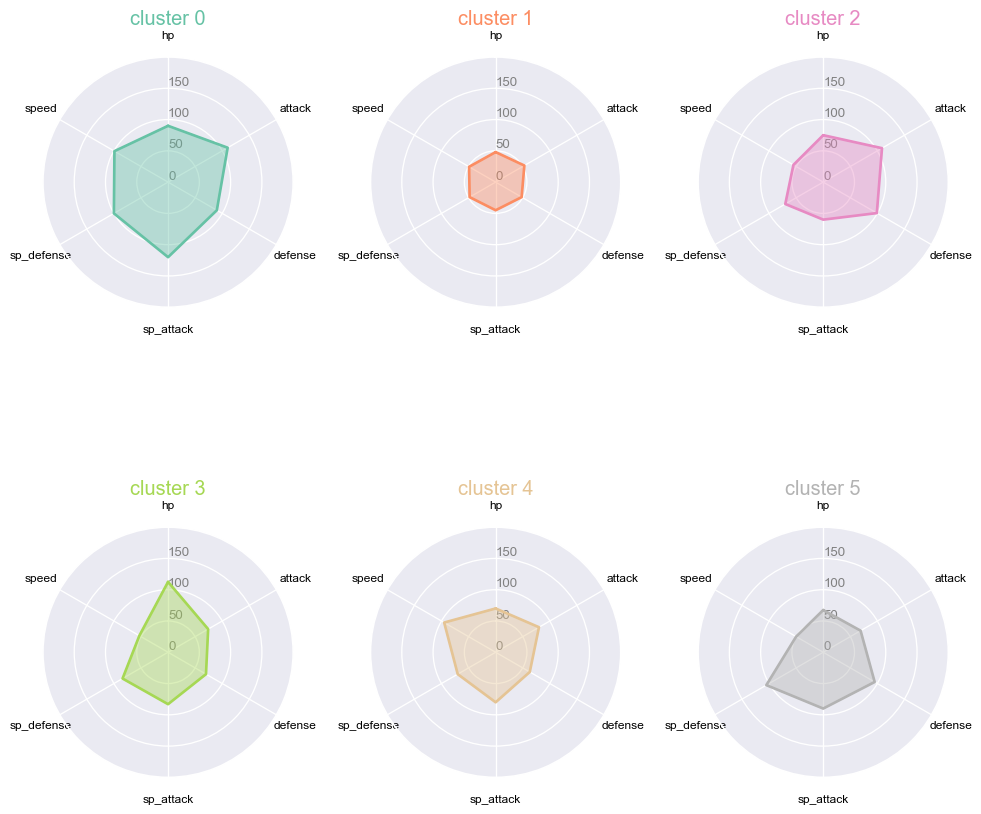

In [22]:
my_dpi=96
plt.figure(figsize=(1000/my_dpi, 1000/my_dpi), dpi=my_dpi)

my_palette = plt.cm.get_cmap("Set2", len(df.index))

# Loop to plot
for row in range(0, len(df.index)):
    make_spider( row=row, title='cluster ' + str(df['clusters'][row]), color=my_palette(row))

plt.tight_layout()
plt.show()